<a href="https://colab.research.google.com/github/Aa2703/Stock_Analysis/blob/main/reddit_data__scrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 2.3 MB/s eta 0:00:00


In [3]:
pip install  asyncpraw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.7/196.7 kB 3.3 MB/s eta 0:00:00


In [51]:
!pip install scikit-learn

In [4]:
import praw
import pandas as pd
import asyncpraw

In [5]:
import asyncpraw

reddit = asyncpraw.Reddit(
    client_id="jGmuRqOy6zlA1CXC1tCCRQ",
    client_secret="lQKhKAWMrTTwMCAlxoZCv9csbtOUHA",
    password="AYUSHarora@4231",
    user_agent="stocks_s",
    username="JealousSale190",
)

print(reddit.read_only)
# Output: False

# continued from code above
reddit.read_only = True

False


In [53]:
pip install nest_asyncio

In [54]:
import nest_asyncio
nest_asyncio.apply()

asyncio.run(main())


                                                title  score  \
0      What Are Your Moves Tomorrow, October 04, 2024    152   
1   Amazon could cut 14,000 managers soon and save...   2989   
2   US port workers and operators reach deal to en...   4684   
3                     Stock Market Is Fucked Tomorrow   4858   
4                         Strike is reportedly over.    2559   
..                                                ...    ...   
93  Ekso Bionics: Advancing Rapidly in the Exoskel...      1   
94                                  TIKTOK VPN stocks      3   
95  (XPP) XP Power - Strong H222 with good visibil...      1   
96  WANdisco ($WAND) - Starting 2023 with $6.6m te...      1   
97            A subreddit for discussing tech stocks.      1   

                                                  url  \
0   https://www.reddit.com/r/wallstreetbets/commen...   
1   https://www.businessinsider.com/amazon-could-c...   
2   https://www.reuters.com/world/us/ship-queue-gr...   
3  

In [11]:
import praw
import pandas as pd
import asyncpraw
import nest_asyncio
import asyncio
from datetime import datetime


async def get_stock_related_posts(subreddit_name, limit=10):
    """Retrieves stock-related posts from a subreddit."""

    subreddit = await reddit.subreddit(subreddit_name, fetch=True)
    posts_data = []

    async for submission in subreddit.hot(limit=limit):
        post_data = {
            "title": submission.title,
            "score": submission.score,
            "url": submission.url,
            "text": submission.selftext,
            "subreddit": subreddit_name,
            "created_utc": datetime.utcfromtimestamp(submission.created_utc).strftime('%Y-%m-%d %H:%M:%S')  # Add date and time
        }
        posts_data.append(post_data)
    return posts_data

async def main():
    subreddit_names = ["wallstreetbets", "stocks", "investing","options","pennystocks","StockMarket","Daytrading","algotrading","cryptocurrency","Techstocks"]  # Add more subreddits
    all_posts = []

    for subreddit_name in subreddit_names:
        posts = await get_stock_related_posts(subreddit_name)
        all_posts.extend(posts)

    df = pd.DataFrame(all_posts)
    print(df)
    # Save the data to a CSV file
    df.to_csv("stock_related_posts.csv", index=False)


if __name__ == "__main__":
    asyncio.run(main())


                                                title  score  \
0      What Are Your Moves Tomorrow, October 04, 2024    156   
1   Amazon could cut 14,000 managers soon and save...   2854   
2   US port workers and operators reach deal to en...   4647   
3                     Stock Market Is Fucked Tomorrow   4833   
4                         Strike is reportedly over.    2533   
..                                                ...    ...   
93  Ekso Bionics: Advancing Rapidly in the Exoskel...      1   
94                                  TIKTOK VPN stocks      3   
95  (XPP) XP Power - Strong H222 with good visibil...      1   
96  WANdisco ($WAND) - Starting 2023 with $6.6m te...      1   
97            A subreddit for discussing tech stocks.      1   

                                                  url  \
0   https://www.reddit.com/r/wallstreetbets/commen...   
1   https://www.businessinsider.com/amazon-could-c...   
2   https://www.reuters.com/world/us/ship-queue-gr...   
3  

##CLEANING OF DATA/ |PRE PROCESSING


In [13]:
import re
import pandas as pd

# load of csv file
df=pd.read_csv("stock_related_posts.csv")

#remove rows where  text is NAN
df_cleaned=df.dropna(subset=['text'])

In [14]:
df.describe()

,score,AAPL,TSLA,AMD,GOOGL,MSFT
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,287.571429,0.010204,0.051020,0.010204,0.040816,0.010204
std,820.428138,0.101015,0.221171,0.101015,0.198882,0.101015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,115.750000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4825.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        98 non-null     object
 1   score        98 non-null     int64 
 2   url          98 non-null     object
 3   text         72 non-null     object
 4   subreddit    98 non-null     object
 5   created_utc  98 non-null     object
 6   AAPL         98 non-null     int64 
 7   TSLA         98 non-null     int64 
 8   AMD          98 non-null     int64 
 9   GOOGL        98 non-null     int64 
 10  MSFT         98 non-null     int64 
dtypes: int64(6), object(5)
memory usage: 8.5+ KB


In [17]:
#clean the text
def clean_text(text):
    text=re.sub(r"http\S+","",text)
    text=re.sub(r'[^A-Za-z\s]+', '', text)
    return text.lower().strip()

# Remove the extra space in the column name
df_cleaned['cleaned_text']=df_cleaned['text'].apply(clean_text)



# Step 3: Extract stock mentions
stock_symbols = ['aapl', 'tsla', 'amd']
for stock in stock_symbols:
    df_cleaned[f'{stock}_mention'] = df_cleaned['cleaned_text'].apply(lambda text: 1 if stock in text else 0)

# Show the first few rows
print(df_cleaned[['cleaned_text', 'aapl_mention', 'tsla_mention', 'amd_mention']].head())

                                         cleaned_text  aapl_mention  \
0                                           view post             0   
5   i used my retirement funds to do this and fuck...             0   
10  please use this thread to discuss your portfol...             0   
11  this is the daily discussion so anything stock...             0   
12  there are plenty of news about more and more s...             0   

    tsla_mention  amd_mention  
0              0            0  
5              0            0  
10             0            0  
11             0            0  
12             0            0  


<ipython-input-17-2cdda5ace699>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cleaned_text']=df_cleaned['text'].apply(clean_text)
<ipython-input-17-2cdda5ace699>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[f'{stock}_mention'] = df_cleaned['cleaned_text'].apply(lambda text: 1 if stock in text else 0)


In [18]:
print(df_cleaned[['cleaned_text', 'aapl_mention', 'tsla_mention', 'amd_mention']].head())



                                         cleaned_text  aapl_mention  \
0                                           view post             0   
5   i used my retirement funds to do this and fuck...             0   
10  please use this thread to discuss your portfol...             0   
11  this is the daily discussion so anything stock...             0   
12  there are plenty of news about more and more s...             0   

    tsla_mention  amd_mention  
0              0            0  
5              0            0  
10             0            0  
11             0            0  
12             0            0  


In [19]:
df_cleaned.to_csv('cleaned_stock_data.csv', index=False)

print("Cleaned data saved to 'cleaned_stock_data.csv'")

Cleaned data saved to 'cleaned_stock_data.csv'


In [86]:

# Remove rows with null values in the 'text' column
df_cleaned = df.dropna(subset=['text'])

# Remove rows where 'text' is empty or contains only whitespace
df_cleaned = df_cleaned[df_cleaned['text'].str.strip().astype(bool)]
print(df_cleaned)

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv("cleaned_stock_related_posts.csv", index=False)



                                                title  score  \
0      What Are Your Moves Tomorrow, October 04, 2024    154   
5   Started a new job today after trying to tradin...   2236   
10  Rate My Portfolio - r/Stocks Quarterly Thread ...      9   
11  r/Stocks Daily Discussion & Options Trading Th...      9   
12  Ideas for profiting on the decline of the Amer...    115   
..                                                ...    ...   
80  Important: Governance Voting [Live Now] for Un...      7   
81  Daily Crypto Discussion - October 4, 2024 (GMT+0)     15   
90                                r/TechStocks Lounge      1   
91  Check industry bases challenges after hurrican...      1   
94                                  TIKTOK VPN stocks      3   

                                                  url  \
0   https://www.reddit.com/r/wallstreetbets/commen...   
5                 https://i.redd.it/q34zzf2wwksd1.png   
10  https://www.reddit.com/r/stocks/comments/1f6a2...   
11 

In [57]:
# Load your cleaned CSV file
df_cleaned = pd.read_csv('cleaned_stock_data.csv')  # Replace with the actual path to your cleaned CSV file

# 1. Convert column headers to uppercase
df_cleaned.columns = [col.upper() for col in df_cleaned.columns]

# No need to separate 'CREATED_UTC', keeping it as is

# Save the updated cleaned data to a new CSV file
df_cleaned.to_csv('cleaned_stock_data_updated.csv', index=False)

print("Updated cleaned data saved to 'cleaned_stock_data_updated.csv'")


Updated cleaned data saved to 'cleaned_stock_data_updated.csv'


#sentiment analysis

In [58]:
!pip install vaderSentiment

In [60]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Check for possible column names
print(df_cleaned.columns)

# Apply sentiment analysis on the cleaned text (replace 'TEXT' with the actual column name if different)
df_cleaned['sentiment'] = df_cleaned['TEXT'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

# Classify sentiment as positive, negative, or neutral based on compound score
df_cleaned['sentiment_label'] = df_cleaned['sentiment'].apply(lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral'))

# Save the data with sentiment analysis
df_cleaned.to_csv('stock_data_with_sentiment.csv', index=False)

print("Sentiment analysis completed and saved to 'stock_data_with_sentiment.csv'")

Index(['TITLE', 'SCORE', 'URL', 'TEXT', 'SUBREDDIT', 'CREATED_UTC', 'AAPL',
       'TSLA', 'AMD', 'GOOGL', 'MSFT', 'CLEANED_TEXT', 'AAPL_MENTION',
       'TSLA_MENTION', 'AMD_MENTION', 'sentiment', 'sentiment_label'],
      dtype='object')
Sentiment analysis completed and saved to 'stock_data_with_sentiment.csv'


In [64]:
# Count the number of mentions of each stock
stock_mentions = df_cleaned[['AAPL_MENTION', 'TSLA_MENTION', 'AMD_MENTION']].sum() # Changed column names to uppercase
print(stock_mentions)

AAPL_MENTION    1
TSLA_MENTION    4
AMD_MENTION     1
dtype: int64


In [81]:
# Import the necessary module
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fill NaN values with empty strings
df['text'] = df['text'].fillna('')

# Perform fit_transform on the text column
X = vectorizer.fit_transform(df['text'])

keywords = vectorizer.get_feature_names_out()
keyword_counts = X.toarray().sum(axis=0)

# Create a DataFrame for keywords
keyword_df = pd.DataFrame({'keyword': keywords, 'count': keyword_counts})
top_keywords = keyword_df.sort_values(by='count', ascending=False).head(20)

print(top_keywords)

       keyword  count
1455     https    165
709        com    151
1905      nbsp    110
3081       www    104
1985   options    102
2311    reddit     82
3048      wiki     54
2865   trading     48
1624      just     45
1780    market     42
2158     price     38
1981    option     36
2663    stocks     34
2661     stock     33
720   comments     33
1692      like     33
18          07     31
1919       new     30
1152       faq     29
3093      year     28


In [69]:
from sklearn.model_selection import train_test_split # import the required function
from sklearn.ensemble import RandomForestClassifier # import the RandomForestClassifier

features = df[['sentiment']] # Only include the 'sentiment' column

# Add the missing columns with default values - this assumes you intend to use these columns later
df['AAPL_MENTION'] = 0
df['TSLA_MENTION'] = 0
df['AMD_MENTION'] = 0

features = df[['sentiment', 'AAPL_MENTION', 'TSLA_MENTION', 'AMD_MENTION']]
target = (df['sentiment'] > 0).astype(int)  # Example target: positive sentiment as 1, else 0

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.95


**#data Visualization**

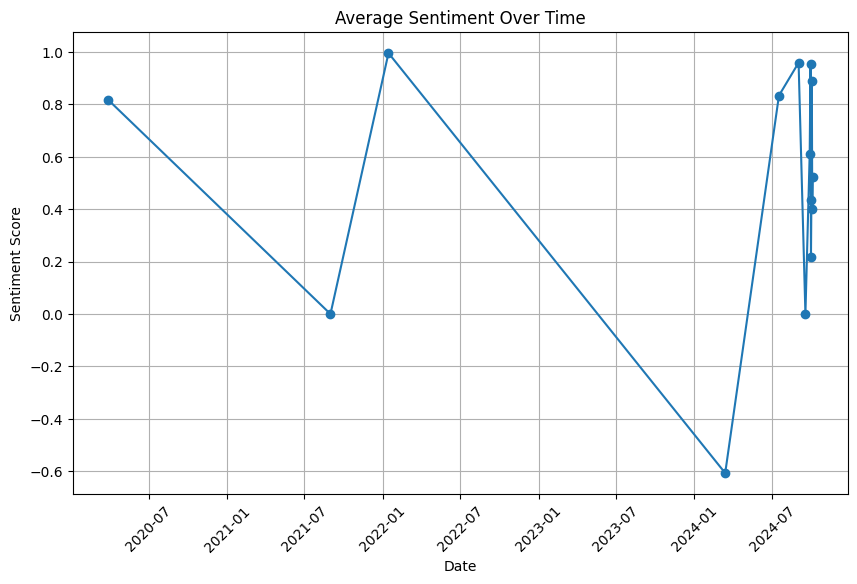

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file into df_cleaned
df_cleaned = pd.read_csv('stock_data_with_sentiment.csv')  # Replace with the actual file name

# Ensure 'CREATED_UTC' is in datetime format (if it's not already)
df_cleaned['CREATED_UTC'] = pd.to_datetime(df_cleaned['CREATED_UTC'], format='%Y-%m-%d %H:%M:%S')  # Adjust format if necessary

# Group by date and calculate the average sentiment
sentiment_trend = df_cleaned.groupby(df_cleaned['CREATED_UTC'].dt.date)['sentiment'].mean()

# Plot average sentiment over time
plt.figure(figsize=(10, 6))
plt.plot(sentiment_trend.index, sentiment_trend.values, marker='o')
plt.title('Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


<ipython-input-68-39ea6e129030>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gr

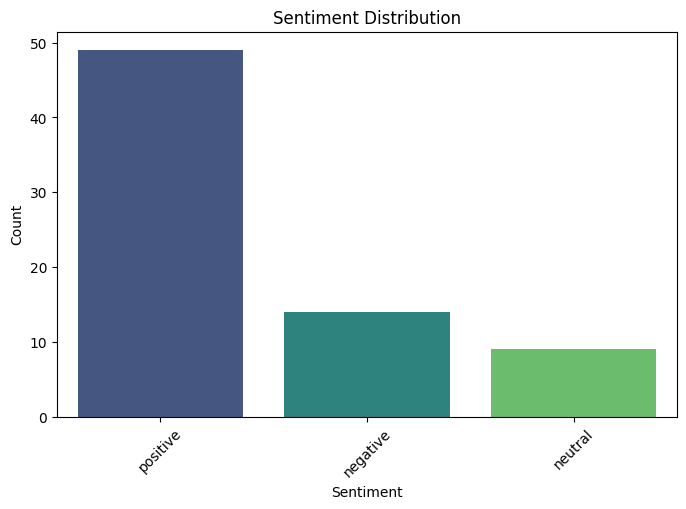

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the sentiment labels
sentiment_counts = df_cleaned['sentiment_label'].value_counts() # Changed to lowercase

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

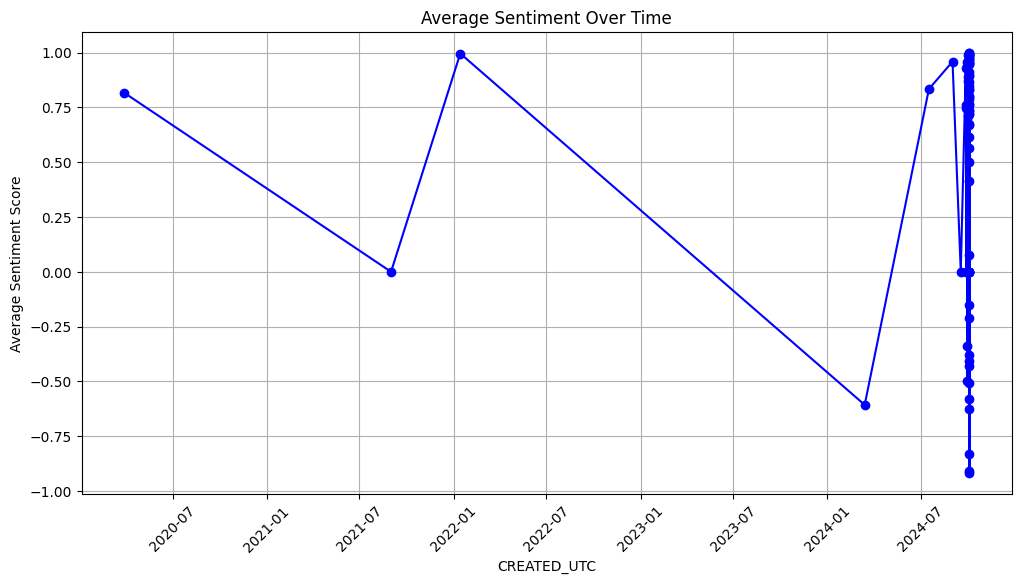

In [71]:
# Convert 'DATE' to datetime format
df_cleaned['CREATED_UTC'] = pd.to_datetime(df_cleaned['CREATED_UTC'], format='%Y-%m-%d') # Changed the format to %Y-%m-%d

# Calculate average sentiment by date
average_sentiment = df_cleaned.groupby('CREATED_UTC')['sentiment'].mean() # Changed 'SENTIMENT' to 'sentiment'

# Plot average sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(average_sentiment.index, average_sentiment.values, marker='o', color='b')
plt.title('Average Sentiment Over Time')
plt.xlabel('CREATED_UTC')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.grid()
plt.show()

<Figure size 1200x600 with 0 Axes>

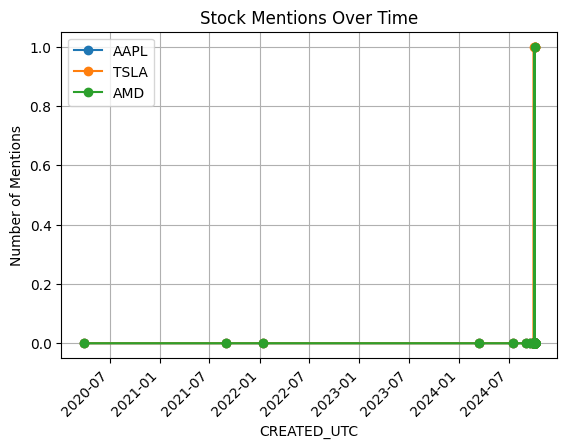

In [73]:
# Count mentions for each stock
stock_mentions = df_cleaned.groupby(['CREATED_UTC'])[['AAPL_MENTION', 'TSLA_MENTION', 'AMD_MENTION']].sum()

# Plot stock mentions over time
plt.figure(figsize=(12, 6))
stock_mentions.plot(marker='o')
plt.title('Stock Mentions Over Time')
plt.xlabel('CREATED_UTC')
plt.ylabel('Number of Mentions')
plt.legend(['AAPL', 'TSLA', 'AMD'])
plt.xticks(rotation=45)
plt.grid()
plt.show()


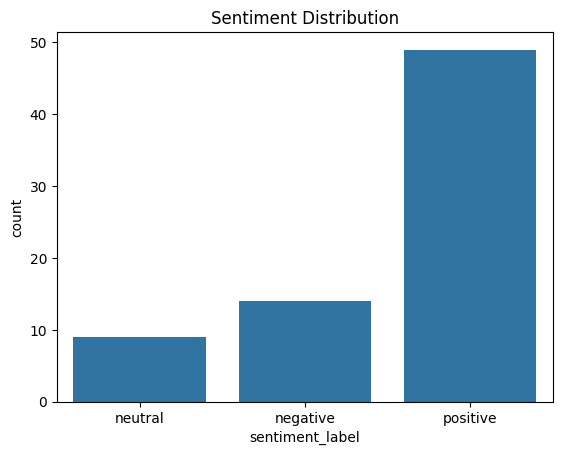

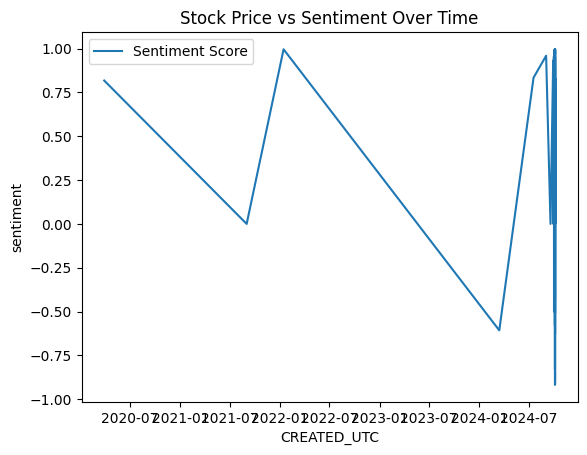

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution
sns.countplot(x='sentiment_label', data=df_cleaned)
plt.title('Sentiment Distribution')
plt.show()

# Group data by date and calculate average sentiment
df_grouped = df_cleaned.groupby('CREATED_UTC')['sentiment'].mean().reset_index()

# Plot average sentiment over time
# Correlation plot (if stock price data is available)
sns.lineplot(data=df_grouped, x='CREATED_UTC', y='sentiment', label='Sentiment Score') # Use 'DATE' if it's the date column
plt.title('Stock Price vs Sentiment Over Time')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


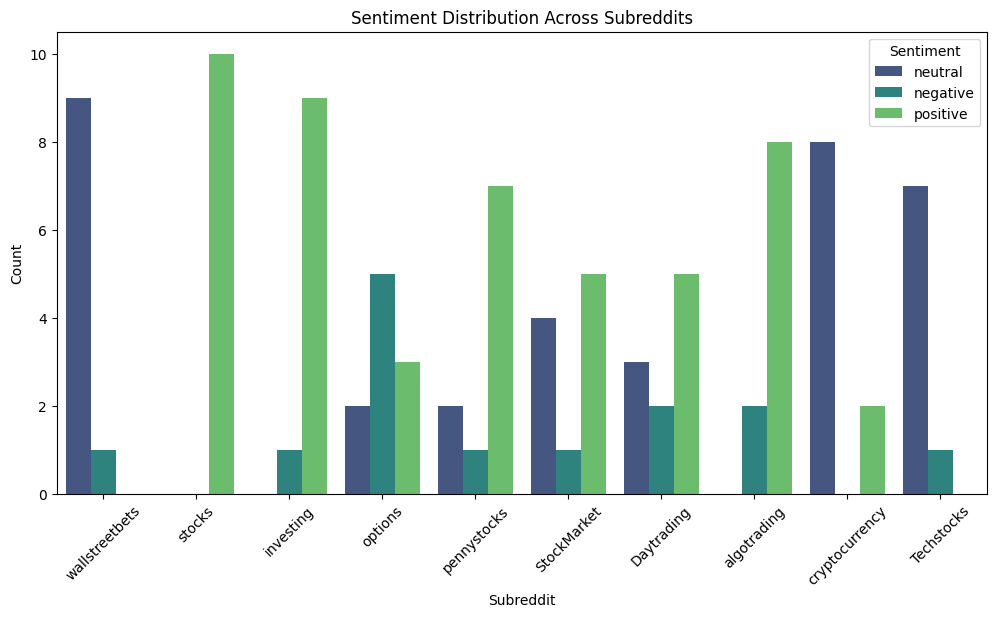

In [76]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis
def analyze_sentiment(text):
    # Check if the input is a string
    if isinstance(text, str):
        score = analyzer.polarity_scores(text)['compound']
        return score
    else:
        # Handle non-string inputs (e.g., return a default value or handle the error)
        return 0  # Example: return 0 for non-string inputs

# Apply sentiment analysis to the 'text' column
df['sentiment'] = df['text'].apply(analyze_sentiment)

# Add a sentiment label based on the score
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

# Plot sentiment distribution across subreddits
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='subreddit', hue='sentiment_label', palette='viridis')
plt.title('Sentiment Distribution Across Subreddits')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

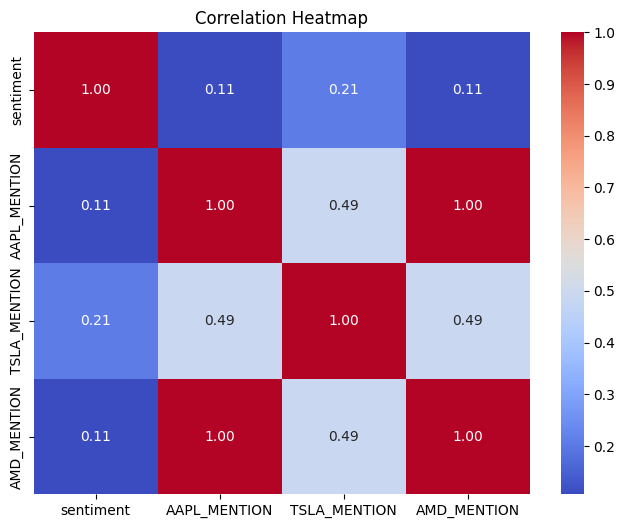

In [74]:
# Create a correlation matrix
correlation_matrix = df_cleaned[['sentiment', 'AAPL_MENTION', 'TSLA_MENTION', 'AMD_MENTION']].corr() # Changed 'SENTIMENT' to 'sentiment'

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


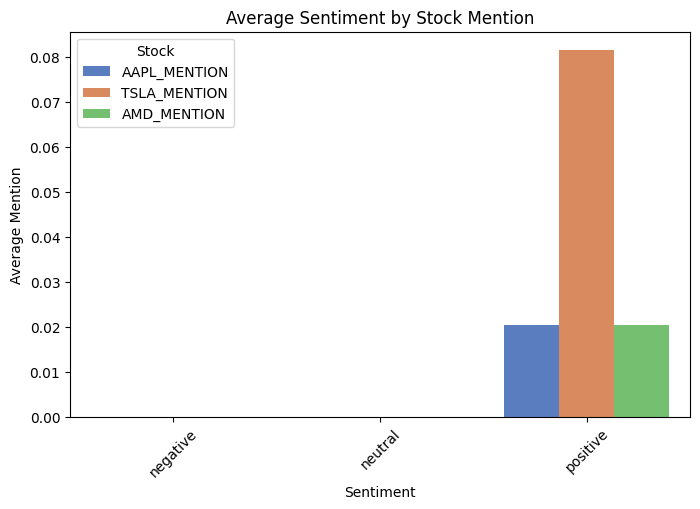

In [75]:
# Create a new DataFrame for sentiment by stock mention
df_sentiment_by_stock = df_cleaned.groupby(['sentiment_label'])[['AAPL_MENTION', 'TSLA_MENTION', 'AMD_MENTION']].mean().reset_index() # Changed 'SENTIMENT_LABEL' to 'sentiment_label'

# Plot average sentiment by stock mention
plt.figure(figsize=(8, 5))
sns.barplot(data=df_sentiment_by_stock.melt(id_vars='sentiment_label'), x='sentiment_label', y='value', hue='variable', palette='muted') # Changed 'SENTIMENT_LABEL' to 'sentiment_label'
plt.title('Average Sentiment by Stock Mention')
plt.xlabel('Sentiment')
plt.ylabel('Average Mention')
plt.xticks(rotation=45)
plt.legend(title='Stock')
plt.show()

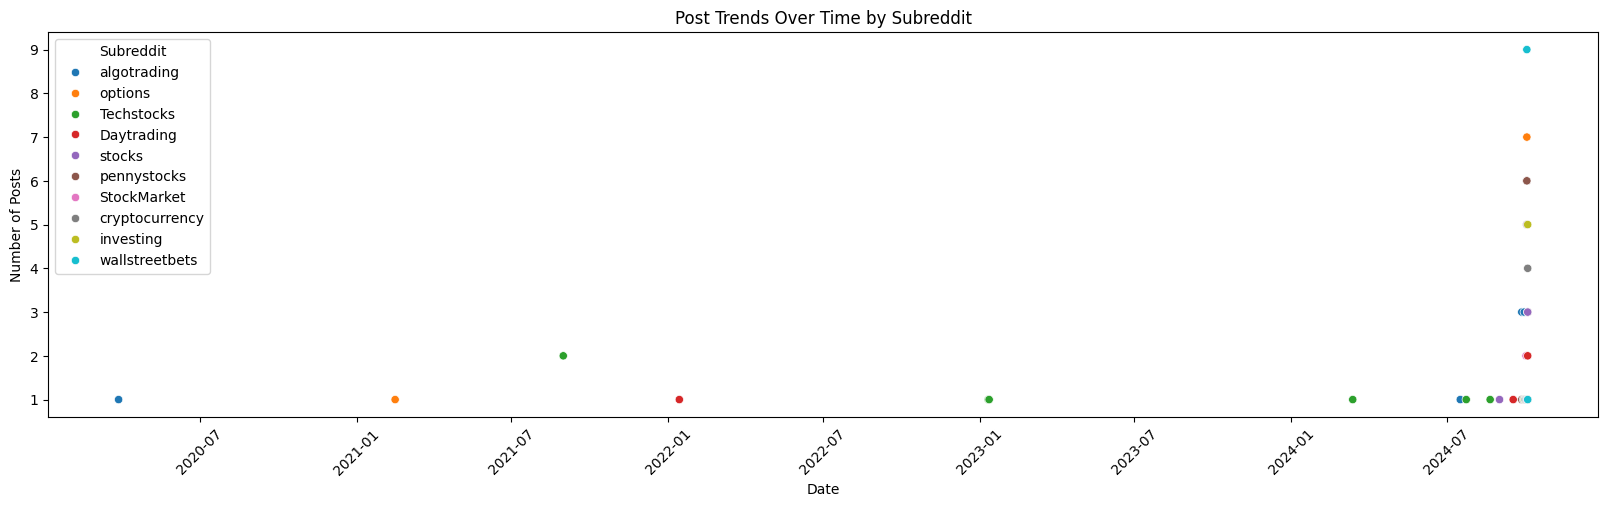

In [85]:
# Convert 'created_utc' to datetime for easier analysis
df['created_utc'] = pd.to_datetime(df['created_utc'], format='%Y-%m-%d %H:%M:%S')

# Extract date for grouping
df['date'] = df['created_utc'].dt.date

# Count posts per day per subreddit
post_trends = df.groupby(['date', 'subreddit']).size().reset_index(name='post_count')

# Plotting the trends
plt.figure(figsize=(20,5))
sns.scatterplot(data=post_trends, x='date', y='post_count', hue='subreddit', marker='o')
plt.title('Post Trends Over Time by Subreddit')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.legend(title='Subreddit')
plt.show()


<ipython-input-79-c20780764bde>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subreddit_activity, x='subreddit', y='post_count', palette='magma')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When g

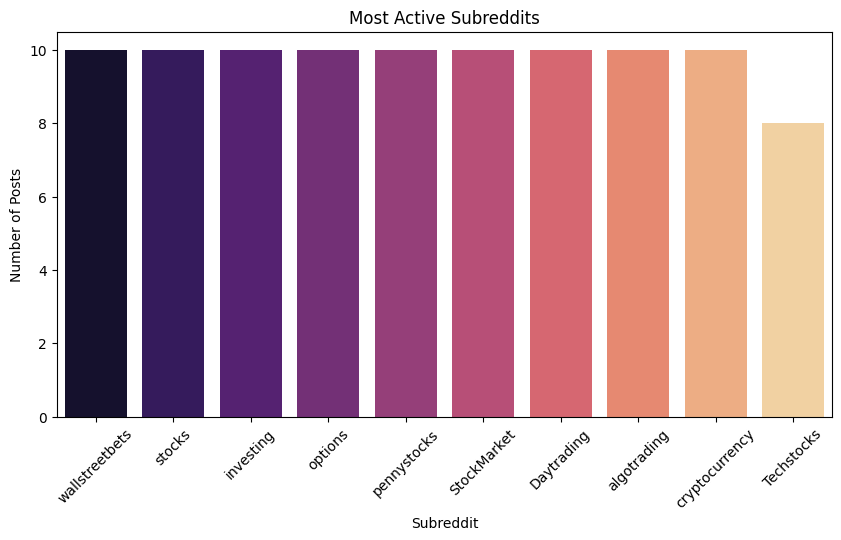

In [79]:
# Count posts per subreddit
subreddit_activity = df['subreddit'].value_counts().reset_index()
subreddit_activity.columns = ['subreddit', 'post_count']

# Plotting the activity
plt.figure(figsize=(10, 5))
sns.barplot(data=subreddit_activity, x='subreddit', y='post_count', palette='magma')
plt.title('Most Active Subreddits')
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

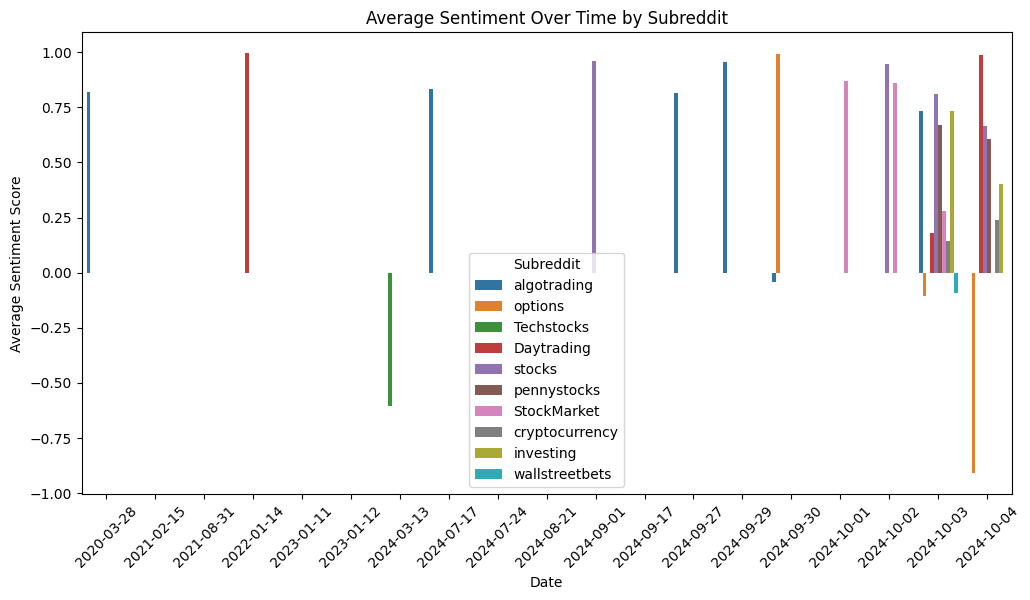

In [80]:
# Calculate average sentiment over time by subreddit
average_sentiment = df.groupby(['date', 'subreddit'])['sentiment'].mean().reset_index()

# Plotting average sentiment over time
plt.figure(figsize=(12, 6))
sns.barplot(data=average_sentiment, x='date', y='sentiment', hue='subreddit')
plt.title('Average Sentiment Over Time by Subreddit')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.legend(title='Subreddit')
plt.show()

In [81]:


from google.colab import files

files.download('stock_data_with_sentiment.csv')
